In [ ]:
/* Step by Step of Linear Regression

X_var =    #define predictors, could be SLR or MLR
Y_var =     #define response

X_train, x_test, y_train, y_test = train_test_split(X_var, Y_var, test_size = 0.2, random = *) #split the TRAINING DATA into train and test data

model = LinearRegression() 

model.fit(X_train, y_train) #instantiate the linear regression model on the training dataset
intercept = model.intercept_
coeff = model.coef_

# the y^ guesses of the model
y_hat_train = model.predict(X_train) #predict y_values of model with training portion of X 
y_hat_test = model.predict(x_test) #predict y_values of model using with testing portion of X

predicted_check = pd.DataFrame(y_hat_train/test, index = y_test.index) #create a DF comparing the y^hat and y_test variables

# error = y_data_point (y_train, y_test) - y^ (y_hat_train, y_hat_test) >>> Evaluation of model... Looking for a LOW test RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
    

train_r2 = r2_score(y_train, y_hat_train))
test_r2 = r2_score(y_test, y_hat_test))


#applying model to TEST dataset
#prepare the test.csv in the same manner the train.csv was prepared
X_real =  #set aside predictor variables of test data

predictions = model.predict(X_real)       #use model to predict y values of test data

# create a DF of the predicted y values along with the ID 
submission = pd.DataFrame(
    {'Index': test_id,                
     'avg_price_per_kg': predictions
    })                                    


# save DataFrame to csv file for submission
submission.to_csv("NAME.csv", index = False)

*/


In [1]:
# Regression models
from sklearn.linear_model import LinearRegression

# Model slection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from scipy.stats import zscore
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from statsmodels.graphics.correlation import plot_corr
%matplotlib inline

# Other
import pandas as pd
import numpy as np
from scipy import stats
import math
import pickle

### Data Fields
Province - Which province the produce was grown

Container - The code for the type of container

Size_Grade - The class of the produce according to their quality

Weight_Kg - The total weight in kilograms

Commodities - The type of produce, e.g. Golden Delicious Apples

Date - The date of the sale

Sales_Total - The total sales price

Total_Qty_Sold - The number of produce sold

Total_Kg_Sold - The total weight of the produce sold in kilograms

Stock_On_Hand - The amount of produce the store has

In [2]:
# Uploading train csv datasets
train_csv = pd.read_csv('df-train_set.csv')
train_df = pd.DataFrame(train_csv)

In [3]:
# Filter for all rows that are related to Golden Delicious Apples
df = train_df[train_df['Commodities'] == 'APPLE GOLDEN DELICIOUS']

In [4]:
df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


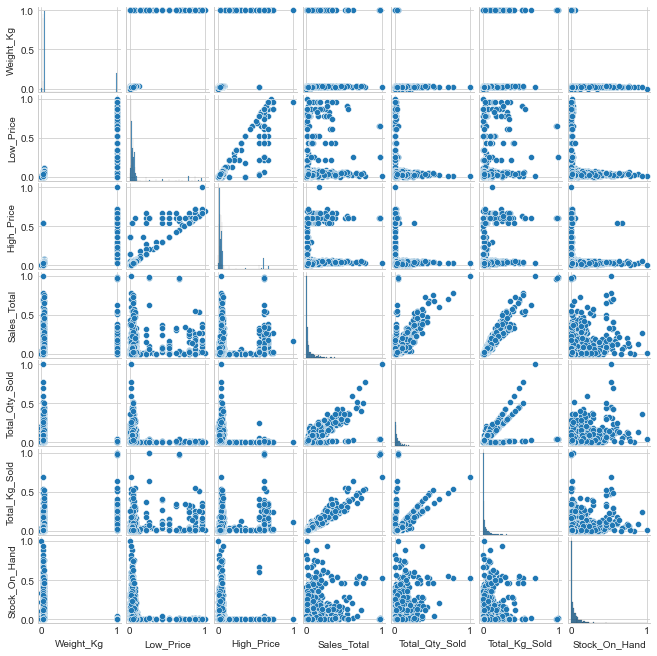

In [542]:
from seaborn import pairplot
g = pairplot(X_normalize)
g.fig.set_size_inches(9,9)

In [5]:
# checked % of unique values per column, chose to leave out variables with less than 0.5%
round(((df.nunique() / df.count())) * 100 , 2)

Province             0.36
Container            0.56
Size_Grade           0.51
Weight_Kg            0.46
Commodities          0.05
Date                 7.53
Low_Price            4.82
High_Price           4.51
Sales_Total         67.83
Total_Qty_Sold      25.87
Total_Kg_Sold       43.55
Stock_On_Hand       37.65
avg_price_per_kg    30.79
dtype: float64

In [6]:
# dropping columns > 0.5% unique values
df_train = df.drop(['Province', 'Weight_Kg', 'Commodities'], axis = 1)

In [7]:
df_train.head()

,Container,Size_Grade,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,M4183,1L,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,JG110,2M,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,JE090,2S,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,M4183,1S,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,IA400,1S,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [8]:
# changing the date to a number. PS I came across an article that said this is a way to handle Dates in regression models
import datetime as dt
pd.to_datetime(df_train['Date'])
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Date']=df_train['Date'].map(dt.datetime.toordinal)

In [9]:
#dummy encoding for the remaining categorical variables
dummies_df = pd.get_dummies(df_train, prefix = ['Container', 'Size_Grade'], columns = ['Container', 'Size_Grade'], drop_first = True)

In [10]:
dummies_df.head()

,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Container_DT063,Container_EC120,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,737677,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,...,0,0,0,0,0,0,0,0,0,0
7,737529,50.0,50.0,16000.0,320,3520.0,0,4.55,0,0,...,0,0,0,0,0,0,1,0,0,0
24,737531,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,0,0,0,0,1,0,0
40,737549,80.0,120.0,32020.0,388,7100.4,443,4.51,0,0,...,0,0,1,0,0,0,0,0,0,0
69,737696,1800.0,1800.0,1800.0,1,400.0,2,4.50,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
X_data = dummies_df.drop('avg_price_per_kg', axis = 1)
y = dummies_df['avg_price_per_kg']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)
X_standardise_1 = pd.DataFrame(X_scaled,columns=X_data.columns)
X_standardise_1.head()

,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Container_DT063,Container_EC120,Container_EF120,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,1.365165,-0.065087,-0.105317,0.811807,0.510117,0.511073,0.571070,-0.055527,-0.545777,-0.198503,...,-0.039233,-0.44198,-0.612085,-0.032026,-0.30986,-0.255934,-0.367265,-0.432837,-0.093731,-0.116187
1,-0.492802,-0.332855,-0.382175,-0.103950,0.471248,0.091837,-0.563874,-0.055527,-0.545777,-0.198503,...,-0.039233,-0.44198,-0.612085,-0.032026,-0.30986,-0.255934,2.722828,-0.432837,-0.093731,-0.116187
2,-0.467695,-0.319467,-0.370639,-0.488870,-0.506948,-0.459029,1.515476,-0.055527,-0.545777,-0.198503,...,-0.039233,-0.44198,-0.612085,-0.032026,-0.30986,-0.255934,-0.367265,2.310338,-0.093731,-0.116187
3,-0.241726,-0.252525,-0.220674,0.306871,0.691504,0.679187,0.047781,-0.055527,-0.545777,-0.198503,...,-0.039233,-0.44198,1.633760,-0.032026,-0.30986,-0.255934,-0.367265,-0.432837,-0.093731,-0.116187
4,1.603688,4.353082,3.655338,-0.468098,-0.562012,-0.419986,-0.561112,-0.055527,-0.545777,-0.198503,...,-0.039233,-0.44198,1.633760,-0.032026,-0.30986,-0.255934,-0.367265,-0.432837,-0.093731,-0.116187


In [13]:
X_train, x_test, y_train, y_test = train_test_split(X_standardise_1, y, test_size = 0.2, random_state = 42)

In [14]:
model = LinearRegression() 

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_hat_train = model.predict(X_train) #predict y_values of model with training portion of X 
y_hat_test = model.predict(x_test) #predict y_values of model using with testing portion of X


In [17]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
train_rmse

1.527529093902367

In [18]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
test_rmse

1.5144042611331718

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
regr_tree = RandomForestRegressor(n_estimators=10)

In [50]:
regr_tree.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10)

In [51]:
train_pred = regr_tree.predict(X_train)

In [52]:
test_pred = regr_tree.predict(x_test)

In [53]:
train_rmse_tree = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse_tree = np.sqrt(mean_squared_error(y_test, test_pred))

In [54]:
train_rmse_tree

0.29322517928297853

In [55]:
test_rmse_tree

0.6520273988876969

In [61]:
#pd.to_datetime(df_dummies['Date'])
#df_dummies['Date'] = pd.DatetimeIndex(df_dummies['Date']).month

In [552]:
#import statsmodels.formula.api as sm
#formula_str = df_test.columns[-1]+' ~ '+'+'.join(df_test.columns[0:7]); formula_str
#model= sm.ols(formula=formula_str, data=df_test)
#fitted = model.fit()

'avg_price_per_kg ~ Container+Size_Grade+Date+Low_Price+High_Price+Total_Kg_Sold+Stock_On_Hand'

In [553]:
#print(fitted.summary())

In [511]:
#remove outliers
#z_scores = stats.zscore(df[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand']])
#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#new_df = df[filtered_entries]

## Test.csv

In [56]:
test_csv = pd.read_csv('df-test_set.csv')
test_df = pd.DataFrame(test_csv)
test_id = test_df['Index']
test_df = test_df.drop('Index', axis=1)

In [57]:
pd.to_datetime(test_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Date']= test_df['Date'].map(dt.datetime.toordinal)

In [58]:
X_real = test_df.drop(['Province', 'Weight_Kg', 'Commodities'], axis = 1)

In [59]:
X_real_dummies = pd.get_dummies(X_real, prefix = ['Container', 'Size_Grade'], columns = ['Container', 'Size_Grade'], drop_first = True) 

In [60]:
X_scaled = scaler.fit_transform(X_real_dummies)
X_standardise = pd.DataFrame(X_scaled,columns=X_real_dummies.columns)
X_standardise.head()

,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Container_DT063,Container_EC120,Container_EF120,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,0.668143,-0.102006,-0.153257,-0.406172,-0.457601,-0.448904,-0.613932,-0.054113,1.804067,-0.168904,...,-0.038236,2.249877,-0.608276,-0.038236,-0.361058,-0.261998,-0.373854,-0.388922,-0.115385,-0.085749
1,-1.456374,0.157216,0.062779,-0.501907,-0.557890,-0.510145,-0.611136,-0.054113,-0.554303,-0.168904,...,-0.038236,-0.444469,-0.608276,-0.038236,2.769636,-0.261998,-0.373854,-0.388922,-0.115385,-0.085749
2,1.177530,-0.124547,-0.194406,-0.532562,-0.564576,-0.524862,-0.551035,-0.054113,1.804067,-0.168904,...,-0.038236,-0.444469,1.643990,-0.038236,-0.361058,-0.261998,-0.373854,-0.388922,-0.115385,-0.085749
3,-0.126998,-0.011842,-0.091532,-0.549068,-0.581291,-0.535484,-0.602750,-0.054113,-0.554303,-0.168904,...,-0.038236,2.249877,-0.608276,-0.038236,-0.361058,-0.261998,-0.373854,-0.388922,-0.115385,-0.085749
4,-0.151846,-0.068195,-0.091532,-0.137004,-0.250335,-0.177117,-0.587375,-0.054113,-0.554303,-0.168904,...,-0.038236,-0.444469,-0.608276,-0.038236,-0.361058,-0.261998,-0.373854,-0.388922,-0.115385,-0.085749


In [61]:
predictions = regr_tree.predict(X_standardise)

In [62]:
submission = pd.DataFrame(
    {'Index': test_id,                
     'avg_price_per_kg': predictions
    })                                    


In [63]:
submission

,Index,avg_price_per_kg
0,1,11.361
1,2,12.404
2,3,10.616
3,4,9.634
4,5,8.671
...,...,...
680,681,4.083
681,682,9.259
682,683,6.509
683,684,7.886


In [36]:
submission.to_csv("sub.csv", index = False)